## Preprocessing  

The dataset includes several columns, each providing key information about the recipes. Here's a brief overview of what each column represents:

**title:** The title of the recipe (e.g., "Chocolate Cake").  
**ingredients:** A list of ingredients required for the recipe (e.g., "flour", "sugar", "eggs").  
**directions:** The step-by-step cooking instructions for preparing the recipe.  
**NER:** Pre-labeled named entities, which can include ingredients, quantities, and other relevant information extracted from the text.  
**source:** The source or author of the recipe.  
**link:** The URL link to the recipe page.  
**site:** The website or platform where the recipe is hosted (e.g., "cookbooks").  

In [1]:
import pandas as pd

In [2]:
#Read the dataset
df = pd.read_csv('recipes_data.csv')

In [3]:
#Number of rows by the number of columns in the dataset
df.shape

(2231142, 7)

In [4]:
#Return first 5 rows in the dataset
df.head()

,title,ingredients,directions,link,source,NER,site
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""bite size shredded rice biscuits"", ""vanilla""...",www.cookbooks.com
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""cream of mushroom soup"", ""beef"", ""sour cream...",www.cookbooks.com
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""pepper"", ""cream cheese"", ""gar...",www.cookbooks.com
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken gravy"", ""cream of mushroom soup"", ""c...",www.cookbooks.com
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""graham cracker crumbs"", ""powdered sugar"", ""p...",www.cookbooks.com


In [5]:
#Names of all columns in the dataset
df.columns

Index(['title', 'ingredients', 'directions', 'link', 'source', 'NER', 'site'], dtype='object')

In [6]:
#Sampling 150000 records from the dataset
subset_df = df.sample(n=150000, random_state=42)

In [7]:
subset_df.shape

(150000, 7)

In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
train_df, test_df = train_test_split(subset_df, test_size=0.2, random_state=42)
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 120000
Testing set size: 30000


## Exploratory Data Analysis (EDA)
In-depth analysis of the dataset to gain valuable insights into its structure and characteristics. The following steps will be covered:

**Identifying Unique and Null Values:** Inspect the dataset for unique values and missing data to understand the completeness and variability of each column.  
**Descriptive Statistics for Text Data:** Summarize the textual data by examining key statistics such as the length of ingredient lists and NER labels.   Measures like the average number of ingredients per recipe and the number of unique ingredients across the dataset will be calculated.  
**Most Common Ingredient Labels:** By counting the most frequently occurring ingredients in the dataset, we can identify key ingredients and patterns.  
**Most Frequent Recipes:** We will explore which recipes are most frequently appearing in the dataset based on ingredient counts.  
**Ingredient and NER Label Count Distribution:** The distribution of ingredient counts and NER labels will be visualized to identify any imbalances or trends.  
These steps will provide a comprehensive overview of the data, enabling us to better understand its structure, detect any issues, and inform subsequent modeling decisions.

In [9]:
#Number of unique values for each variable
train_df.nunique(axis=0)

title           93139
ingredients    119980
directions     119768
link           120000
source              2
NER            116756
site               28
dtype: int64

In [10]:
#Find count of rows with null values
train_df.isnull().sum()

title          0
ingredients    0
directions     0
link           0
source         0
NER            0
site           0
dtype: int64

In [11]:
#summarize the count, unique values, top and frequency
train_df.describe()

,title,ingredients,directions,link,source,NER,site
count,120000,120000,120000,120000,120000,120000,120000
unique,93139,119980,119768,120000,2,116756,28
top,Broccoli Casserole,"[""Ingredients:""]","[""Mix all ingredients together.""]",www.cookbooks.com/Recipe-Details.aspx?id=875791,Gathered,[],www.cookbooks.com
freq,231,3,15,1,88696,33,48334


In [88]:
import ast
import pandas as pd

eda_df = train_df.copy()

# Convert the string representations of lists into actual lists
eda_df['ingredients'] = eda_df['ingredients'].apply(ast.literal_eval)
eda_df['NER'] = eda_df['NER'].apply(ast.literal_eval)

# Find the number of ingredients and NER labels per recipe
eda_df['ingredient_count'] = eda_df['ingredients'].apply(len)
#Length of NER labels list
eda_df['ner_label_count'] = eda_df['NER'].apply(len)

# Average number of ingredients per recipe
avg_ingredients = int(eda_df['ingredient_count'].mean())
print(f"Average number of ingredients per recipe: {avg_ingredients}")

# Average number of NER labels per recipe
avg_ner_labels = int(eda_df['ner_label_count'].mean())
print(f"Average number of NER labels per recipe: {avg_ner_labels}")

# Number of unique ingredients in the dataset
unique_ingredients = set([ingredient.lower() for sublist in eda_df['ingredients'] for ingredient in sublist])
print(f"Number of unique ingredients: {len(unique_ingredients)}")

# Most common ingredients
ingredient_counts = pd.Series([ingredient.lower() for sublist in eda_df['ingredients'] for ingredient in sublist]).value_counts()
print(f"Most common ingredients:\n{ingredient_counts.head(10)}")

# NER label distribution
ner_label_counts = pd.Series([label.lower() for sublist in eda_df['NER'] for label in sublist]).value_counts()
print(f"Most common NER labels:\n{ner_label_counts.head(10)}")


Average number of ingredients per recipe: 8
Average number of NER labels per recipe: 8
Number of unique ingredients: 393610
Most common ingredients:
2 eggs               5315
1 tsp. vanilla       4648
1/2 tsp. salt        4354
1 tsp. salt          4352
1 egg                4341
1/2 teaspoon salt    3772
1 teaspoon salt      3717
1 c. sugar           3487
salt and pepper      2918
salt                 2710
Name: count, dtype: int64
Most common NER labels:
salt       51433
sugar      32402
butter     27124
flour      25088
eggs       22596
onion      20858
garlic     19956
milk       19165
water      18092
vanilla    14971
Name: count, dtype: int64


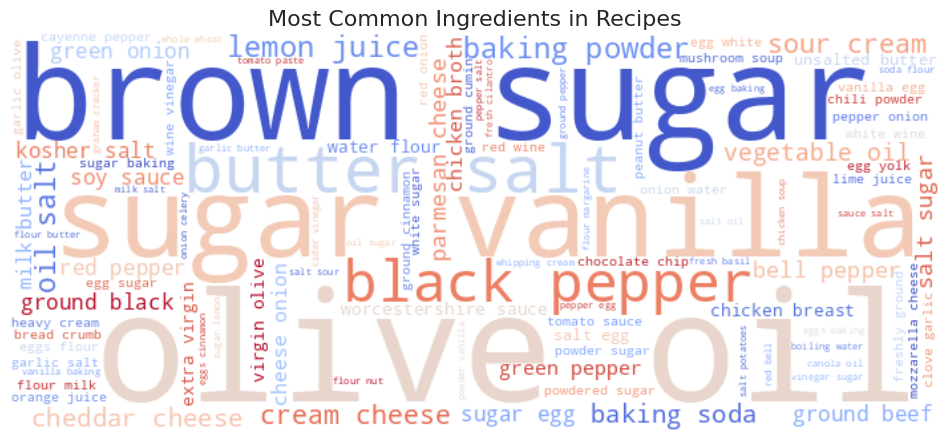

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ingredients_list = eda_df['NER'].explode().str.strip().dropna()

# Generate the word cloud from the ingredient list
ingredient_wordcloud = WordCloud(
    width=700,
    height=300,
    background_color='white',
    colormap='coolwarm',  
    max_words=100,  
    contour_width=1,  
    contour_color='black',  
    random_state=42  
).generate(' '.join(ingredients_list))

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(ingredient_wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Most Common Ingredients in Recipes', fontsize=16)
plt.show()


/tmp/ipykernel_473425/3007864763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_titles.index, y=top_titles.values, palette="coolwarm")


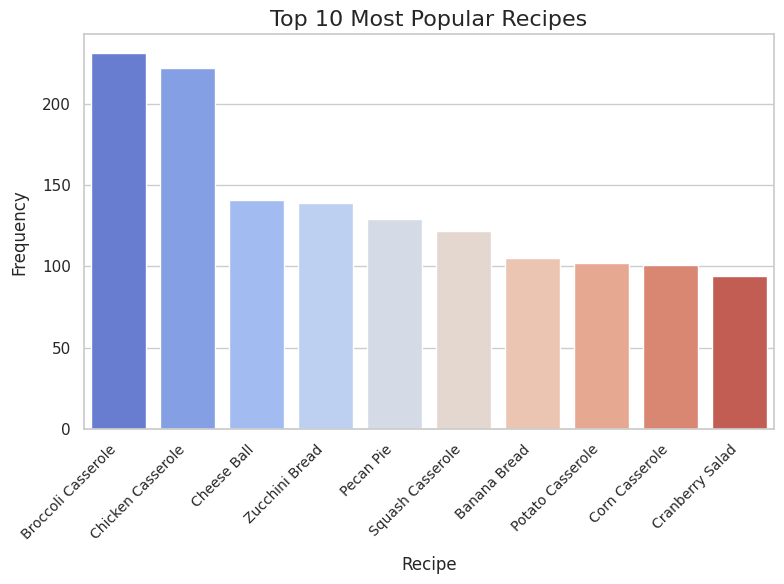

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most common titles
top_titles = eda_df['title'].value_counts().head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_titles.index, y=top_titles.values, palette="coolwarm")
plt.title("Top 10 Most Popular Recipes", fontsize=16)
plt.xlabel("Recipe", fontsize=12, labelpad=10)
plt.ylabel("Frequency", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [91]:
# Count ingredients and NER labels for each recipe
eda_df['ingredient_count'] = eda_df['ingredients'].apply(len)
eda_df['ner_label_count'] = eda_df['NER'].apply(len)

eda_df[['title', 'ingredient_count', 'ner_label_count']].head()

,title,ingredient_count,ner_label_count
225794,Coconut Crunch Pie,6,6
1415107,Heirloom Tomato Gazpacho With Lobster,14,14
552394,Waldorf Salad(Serves 4),6,6
870494,Pineapple Cake,2,2
1554034,Baked Squash And Zucchini,9,6


In [93]:
def calculate_accuracy_count_based(ingredients, ner_labels):
    # Count the ingredients and NER labels
    ingredient_count = len(ingredients)
    ner_label_count = len(ner_labels)
    
    # Calculate accuracy as the ratio of matching counts
    if ingredient_count == 0:
        return 0  # Avoid division by zero
    accuracy = min(ingredient_count, ner_label_count) / ingredient_count * 100 
    
    return accuracy

# calculate accuracy for each row
eda_df['accuracy'] = eda_df.apply(lambda row: calculate_accuracy_count_based(row['ingredients'], row['NER']), axis=1)

print(eda_df[['title', 'accuracy']].tail())


                            title    accuracy
217984                   Barbecue  100.000000
1852958         Fiery Sweet Chips  100.000000
1341790     Classic Deviled Eggs    87.500000
902766    Botercake (Butter Cake)   88.888889
1660883  Mahogany Roasted Chicken  100.000000


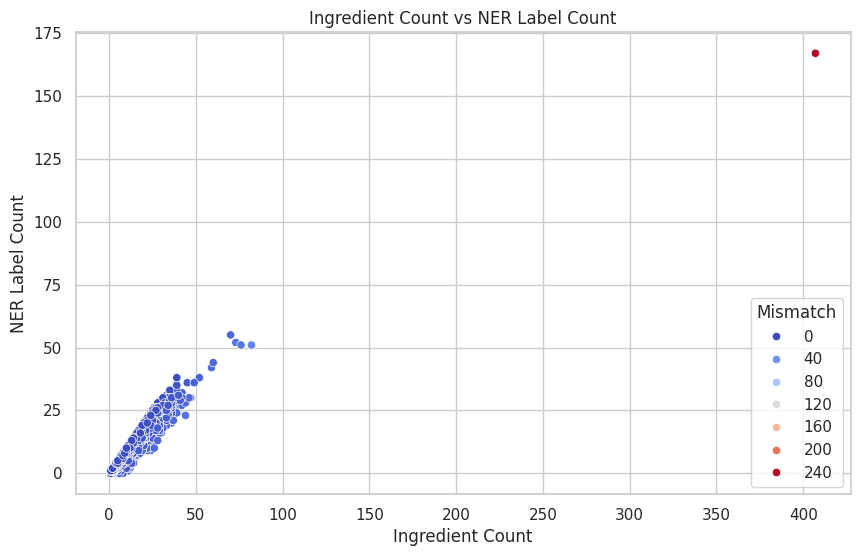

In [95]:
# Find rows where the ingredient count and NER label count do not match
eda_df['ingredient_count'] = eda_df['ingredients'].apply(len)
eda_df['ner_label_count'] = eda_df['NER'].apply(len)
eda_df['count_difference'] = eda_df['ingredient_count'] - eda_df['ner_label_count']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=eda_df['ingredient_count'], y=eda_df['ner_label_count'], hue=eda_df['count_difference'], palette='coolwarm')
plt.title('Ingredient Count vs NER Label Count')
plt.xlabel('Ingredient Count')
plt.ylabel('NER Label Count')
plt.legend(title='Mismatch', loc='lower right')
plt.show()

In [96]:
# Define accuracy threshold
accuracy_threshold = 95

# Filter rows with mismatches
mismatched_rows = eda_df[eda_df['count_difference'] != 0]
print(f'{len(mismatched_rows)} number of rows with mismatch in number of ingredients and labels')

# Filter rows with accuracy greater than or equal to the threshold
filtered_train_df = eda_df[eda_df['accuracy'] <= accuracy_threshold]

# Inspect the filtered dataset
print(f'{len(filtered_train_df)} number of recipes with NER labels below threshold')


35623 number of rows with mismatch in number of ingredients and labels
35449 number of recipes with NER labels below threshold


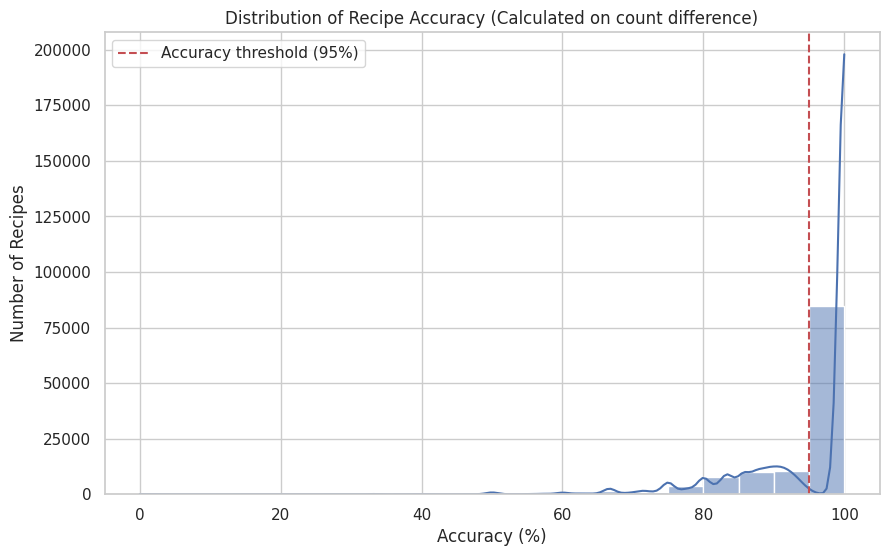

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_threshold = 95

# Plot the distribution of accuracy values
plt.figure(figsize=(10, 6))
sns.histplot(eda_df['accuracy'], bins=20, kde=True)
plt.axvline(x=accuracy_threshold, color='r', linestyle='--', label=f'Accuracy threshold ({accuracy_threshold}%)')
plt.title('Distribution of Recipe Accuracy (Calculated on count difference)')
plt.xlabel('Accuracy (%)')
plt.ylabel('Number of Recipes')
plt.legend()
plt.show()


## Data Cleaning & Standardization  

Before any further processing, it is essential to clean and normalize the dataset. Using the EDA analysis the preprocessing will be completed:

**Handling Missing Values**  

Remove rows with missing title, ingredients or directions since these are essential for identifying a recipe. 1 row with missing title was identified and it will be removed

**Removing Duplicates**  
Remove duplicate rows where all fields are identical, for title ingredients and directions. Multiple recipes with same titles were identified but they will be removed only if their ingredients and directions are also duplicates.

**Remove unwanted columns**  
Drop link, source and site columns from the dataset as they are not required for further processing.

**Standardizing Text**  
Convert the string representation of lists to actual lists.  
Convert all text columns (title, directions, ingredients, NER) to lowercase to ensure uniformity and reduce the impact of case sensitivity.  
Combine the title, ingredients, directions into one feature on which further preprocessing can be done.
Remove special characters, extra spaces, and unwanted formatting from the combined feature column.  
Replace invalid characters or numbers with the corrected inputs(E.g. where 1 is incorrectly represented as the character l).

**Remove Noise**  
Rows having predefined NER labels that match less than 90% of the ingredients list are dropped to avoid inconsistencies in the training data and to have a more clean and accurate data.  
Remove rows that are not related to recipe data.

***Note:***
Tokenization, stop word removal, and lemmatization were not performed as part of preprocessing because we aim to preserve phrases in ingredient names for readability. For example, 'cream of mushroom soup' should remain intact.

In [19]:
#Drop rows with null values
df_cleaned = train_df.dropna()
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.shape

(120000, 7)

In [20]:
#Remove exact duplicates based on title, ingredients, and directions
df_cleaned = df_cleaned.drop_duplicates(subset=['title', 'ingredients', 'directions'], keep='first')

In [21]:
#Drop columns that won't be needed for future NER on ingredients and quantities
df_cleaned = df_cleaned[['title', 'ingredients','directions', 'NER']]

In [22]:
import ast

def combine_relevant_features(df_cleaned):
    """
    Function to combine the relevant features - title, ingredients, directions for further processing
    Parameters:
        df_cleaned: The DataFrame containing the relevant columns.
    Returns:
        df_cleaned: The cleaned DataFrame with the additional combined feature column.
    """
    # Convert ingredients, directions, and NER to lowercase lists
    df_cleaned['ingredients'] = df_cleaned['ingredients'].apply(lambda x: [i.lower() for i in ast.literal_eval(x)])
    df_cleaned['directions'] = df_cleaned['directions'].apply(lambda x: [i.lower() for i in ast.literal_eval(x)])
    
    # Concatenate relevant columns for NER
    df_cleaned['combined'] = df_cleaned['title'] + ' ' + df_cleaned['ingredients'].astype(str) + ' ' + df_cleaned['directions'].astype(str)

    # Lowercase the 'combined' column
    df_cleaned['combined'] = df_cleaned['combined'].apply(lambda x: x.lower())

    return df_cleaned

df_cleaned = combine_relevant_features(df_cleaned)

print("The new combined feature is created by combining title, ingredients and directions.\n\n")

# Check the first five of 'combined' column
pd.set_option('display.max_colwidth', None)
df_cleaned['combined'].head()

The new combined feature is created by combining title, ingredients and directions.




0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         coconut crunch pie ['4 egg whites', '1 c. nuts', '1 c. sugar', '1 c. coconut', '1 c. graham cracker crumbs', '1 tsp. vanilla'] ['beat egg whites until frothy.', 'add sugar; beat for 1 minute. add other ingredients.', 'pour into buttered pie pan.', 'bake 

In [23]:
import ast

from unidecode import unidecode

def normalize_to_ascii(text):
    return unidecode(text)


def clean_labels(df_cleaned):
    """
    Function to clean the recipe dataset by removing NER labels with empty string and unwanted symbols.
    Parameters:
        df_cleaned: The DataFrame containing the recipe data with NER label column.
    Returns:
        df_cleaned: The cleaned DataFrame with rows removed from cleaning the NER label column
    """
    # Convert all NER labels to lowercase and evaluate them as lists
    df_cleaned['NER'] = df_cleaned['NER'].apply(lambda x: [i.lower() for i in ast.literal_eval(x)])
    
    # Clean each item in the 'NER' column to remove unwanted symbols but preserve alphanumeric characters, hyphens, and spaces
    def clean_item(item):
        item = normalize_to_ascii(item)
        item = ''.join(e for e in item if e.isalnum() or e in ['-', ' '])  # Remove unwanted symbols but keep alphanumeric and spaces
        if any(char.isdigit() for char in item):
            return ""  # Return empty string, depending on how you want to handle it
        return item
    
    # Apply the clean_item function to each item in the 'NER' list
    df_cleaned['NER'] = df_cleaned['NER'].apply(lambda x: [clean_item(item) for item in x])

    df_cleaned['NER'] = df_cleaned['NER'].apply(lambda x: [item for item in x if item != ""])
    
    df_cleaned = df_cleaned[df_cleaned['NER'].apply(lambda x: x != [])].reset_index(drop=True)
    
    return df_cleaned

df_cleaned = clean_labels(df_cleaned)


# Print the cleaned NER column
print(f'The NER label was cleaned of unwanted symbols and empty values and the new shape is {df_cleaned.shape}')
df_cleaned['NER'].head()

The NER label was cleaned of unwanted symbols and empty values and the new shape is (119966, 5)


0                                                                                                                                                                    [sugar, vanilla, graham cracker crumbs, egg whites, nuts, coconut]
1    [creme fraiche, lobsters, lemon juice, leeks, sherry vinegar, freshly ground black pepper, red jalapeno chile, red bell pepper, lime juice, white wine, kosher salt, yellow heirloom tomatoes, orange bell pepper, fresh cilantro]
2                                                                                                                                                                   [lemon juice, celery, red apples, mayonnaise, walnuts, light cream]
3                                                                                                                                                                                                              [pineapple, yellow cake]
4                                                                       

In [24]:
import pandas as pd

def remove_rows_with_inaccurate_labels(df_cleaned, threshold=90):
    """
    Function to clean the recipe dataset by removing rows where less than 90% percent of NER labels exist in the data.
    Parameters:
        df_cleaned: The DataFrame containing the recipe data with 'ingredients' and 'NER' columns.
        threshold (int): The minimum percentage of correct labels for ingredients in NER to keep the row (default is 90%).
    Returns:
        df_cleaned: The cleaned DataFrame with rows removed where less than the 90% percent of ingredients are correctly identified.
    """

    # Function to check if any NER label is found in the ingredient phrase
    def verify_ner_labels(ingredients, ner_labels):
        incorrect_ingredients = []
        for ingredient in ingredients:
            match_found = False
            for label in ner_labels:
                # Check if the label is a substring of the ingredient phrase (case-insensitive)
                if label.lower() in ingredient.lower():
                    match_found = True
                    break
            if not match_found:
                incorrect_ingredients.append(ingredient)
        return incorrect_ingredients
    
    # Function to check if the percentage of correct matches is above the threshold
    def is_partial_match(incorrect_ingredients, ingredients, threshold=90):
        incorrect_count = len(incorrect_ingredients)
        total_count = len(ingredients)
        match_percentage = (total_count - incorrect_count) / total_count * 100
        return match_percentage < threshold

    # Create a new DataFrame to avoid modifying the original one
    df_filter = df_cleaned[['ingredients', 'NER']]

    # Apply the NER verification function to each row in the dataframe
    df_filter['incorrect_ingredients'] = df_filter.apply(
        lambda row: verify_ner_labels(row['ingredients'], row['NER']), axis=1
    )

    # Filter rows where less than 90% of ingredients are matched in the NER labels
    partial_ner_df = df_filter[df_filter.apply(
        lambda row: is_partial_match(row['incorrect_ingredients'], row['ingredients'], threshold=threshold), axis=1
    )]

    # Check if any rows have partial NER matches and drop them from df_cleaned
    if len(partial_ner_df) > 0:
        print(f"Dropped {len(partial_ner_df)} rows with less than {threshold}% NER matches")
        # Get the indices of rows with partial matches
        partial_ner_indices = partial_ner_df.index
        
        # Drop these rows from the original df_cleaned
        df_cleaned = df_cleaned.drop(partial_ner_indices)
    else:
        print(f"No rows with less than {threshold}% NER matches")

    # Return the cleaned DataFrame
    print(f"Cleaned dataframe shape: {df_cleaned.shape}")
    return df_cleaned

df_cleaned = remove_rows_with_inaccurate_labels(df_cleaned, 90)

/tmp/ipykernel_929036/3960747385.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['incorrect_ingredients'] = df_filter.apply(


Dropped 16695 rows with less than 90% NER matches
Cleaned dataframe shape: (103271, 5)


In [25]:
#Clean the dataset of special characters, punctuations, spaces where required

import re

def remove_unwanted_characters(df_cleaned):
    """
    Standardize the text in the specified column of the dataframe by applying various regex transformations.
    Parameters:
    df_cleaned: The input dataframe.
    Returns:
    df_cleaned: The dataframe with the 'normalized_combined' column added.
    """
    
    # Apply the transformations to the specified column
    df_cleaned['normalized_combined'] = df_cleaned['combined'].apply(
        lambda x: re.sub(r'\\+[a-zA-Z]|[^a-z0-9\s./-]', ' ',  # Keep alphanumeric characters, spaces, periods, slashes, and hyphens
                        # Replace multiple spaces with a single space
                        re.sub(r'(?<!\d)\.(?!\d)', ' ',  # Remove periods that are not part of numbers
                               re.sub(r'(?<=\d|[^\w])-', ' ',  # Remove hyphens that come after numbers
                                      re.sub(r'(\d)\s*/\s*(\d)', r'\1/\2',  # Normalize fractions by removing spaces around the slash (e.g., "1 / 2" -> "1/2")
                                             re.sub(r'(?<!\d)\s*/\s*(?!\d)', ' ',  # Remove slashes that are not followed by a number (e.g., '/brown' -> 'brown')
                                                    str(x)  # The input data to apply the normalization
                                                   ))))).strip()  # Strip leading/trailing spaces
    )
    
    # Remove extra spaces
    df_cleaned['normalized_combined'] = df_cleaned['normalized_combined'].str.replace(r'\s+', ' ', regex=True).str.strip()
    
    return df_cleaned

df_cleaned = remove_unwanted_characters(df_cleaned)
df_cleaned.head()


,title,ingredients,directions,NER,combined,normalized_combined
0,Coconut Crunch Pie,"[4 egg whites, 1 c. nuts, 1 c. sugar, 1 c. coconut, 1 c. graham cracker crumbs, 1 tsp. vanilla]","[beat egg whites until frothy., add sugar; beat for 1 minute. add other ingredients., pour into buttered pie pan., bake at 350° for 30 minutes., top with sliced bananas and cool whip.]","[sugar, vanilla, graham cracker crumbs, egg whites, nuts, coconut]","coconut crunch pie ['4 egg whites', '1 c. nuts', '1 c. sugar', '1 c. coconut', '1 c. graham cracker crumbs', '1 tsp. vanilla'] ['beat egg whites until frothy.', 'add sugar; beat for 1 minute. add other ingredients.', 'pour into buttered pie pan.', 'bake at 350° for 30 minutes.', 'top with sliced bananas and cool whip.']",coconut crunch pie 4 egg whites 1 c nuts 1 c sugar 1 c coconut 1 c graham cracker crumbs 1 tsp vanilla beat egg whites until frothy add sugar beat for 1 minute add other ingredients pour into buttered pie pan bake at 350 for 30 minutes top with sliced bananas and cool whip
1,Heirloom Tomato Gazpacho With Lobster,"[8 large yellow heirloom tomatoes (about 4 pounds), peeled and seeded, 1 orange bell pepper, quartered, 1 red bell pepper, quartered, 1 large or 2 small leeks, sliced, 1 teaspoon finely chopped red jalapeno chile, 1/2 cup sherry vinegar, 1/4 cup white wine, 1 tablespoon kosher salt, 1/2 teaspoon freshly ground black pepper, 3/4 cup chopped fresh cilantro, divided, 2 (1 1/4-pound) lobsters, steamed and shelled, 1/2 cup mexican crema, creme fraiche, or sour cream, 1 tablespoon fresh lime juice, 1 tablespoon fresh lemon juice]","[process first 9 ingredients, in batches, in a blender until smooth. stir in 1/2 cup chopped cilantro. chill at least 1 hour or up to 1 day., slice lobster tails into medallions, and split each claw into 2 pieces by cutting across the flat side., combine crema, lime juice, and lemon juice in a small bowl., divide gazpacho among 6 bowls. top evenly with lobster, crema mixture, and remaining 1/4 cup cilantro.]","[creme fraiche, lobsters, lemon juice, leeks, sherry vinegar, freshly ground black pepper, red jalapeno chile, red bell pepper, lime juice, white wine, kosher salt, yellow heirloom tomatoes, orange bell pepper, fresh cilantro]","heirloom tomato gazpacho with lobster ['8 large yellow heirloom tomatoes (about 4 pounds), peeled and seeded', '1 orange bell pepper, quartered', '1 red bell pepper, quartered', '1 large or 2 small leeks, sliced', '1 teaspoon finely chopped red jalapeno chile', '1/2 cup sherry vinegar', '1/4 cup white wine', '1 tablespoon kosher salt', '1/2 teaspoon freshly ground black pepper', '3/4 cup chopped fresh cilantro, divided', '2 (1 1/4-pound) lobsters, steamed and shelled', '1/2 cup mexican crema, creme fraiche, or sour cream', '1 tablespoon fresh lime juice', '1 tablespoon fresh lemon juice'] ['process first 9 ingredients, in batches, in a blender until smooth. stir in 1/2 cup chopped cilantro. chill at least 1 hour or up to 1 day.', 'slice lobster tails into medallions, and split each claw into 2 pieces by cutting across the flat side.', 'combine crema, lime juice, and lemon juice in a small bowl.', 'divide gazpacho among 6 bowls. top evenly with lobster, crema mixture, and remaining 1/4 cup cilantro.']",heirloom tomato gazpacho with lobster 8 large yellow heirloom tomatoes about 4 pounds peeled and seeded 1 orange bell pepper quartered 1 red bell pepper quartered 1 large or 2 small leeks sliced 1 teaspoon finely chopped red jalapeno chile 1/2 cup sherry vinegar 1/4 cup white wine 1 tablespoon kosher salt 1/2 teaspoon freshly ground black pepper 3/4 cup chopped fresh cilantro divided 2 1 1/4 pound lobsters steamed and shelled 1/2 cup mexican crema creme fraiche or sour cream 1 tablespoon fresh lime juice 1 tablespoon fresh lemon juice process first 9 ingredients in batches in a blender until smooth stir in 1/2 cup chopped cilantro chill at least 1 hour or up to 1 day slice lobster tails into medallions and split each claw

In [26]:

def rectify_the_l_character(df_cleaned):
    '''
    Rectify values where the character l was incorrectly used in the data
    Parameters:
    df_cleaned: The input dataframe.
    Returns:
    df_cleaned: The dataframe with the 'normalized_combined' column added.
    '''
#Find rows where l is part of fraction
    filtered_rows = df_cleaned[df_cleaned['normalized_combined'].str.contains(r'\bl/\b', case=False, na=False)]
#Find index of rows with l from the filtered rows
    matching_rows = filtered_rows[filtered_rows['normalized_combined'].str.contains('l', regex=False)].index
#Replace all l in filtered rows with 1 as these rows have incorrectly represented 1 as l
    df_cleaned.loc[matching_rows, 'normalized_combined'] = df_cleaned.loc[matching_rows, 'normalized_combined'].str.replace('l', '1', regex=False)

# Replace 'l' with '1' only when it is followed by ' lb' in the entire dataset
    df_cleaned['normalized_combined'] = df_cleaned['normalized_combined'].str.replace(r'(\d*)\s*l\s+lb', r'\1 1 lb', regex=True)

# Replace 'l' with 'liter' for cases where a number is followed by the letter 'l'
    df_cleaned['normalized_combined'] = df_cleaned['normalized_combined'].str.replace(r'\b\d+(\.\d+)?\s+l(?!/)\b', lambda x: x.group(0).replace(' l', ' liter'), regex=True)

# Add space where an alphabet or word is followed by / so that it is not interpreted as a fraction. E.g,25 g/1/4 cup becomes 25 g / 1/4 cup
    df_cleaned['normalized_combined'] = df_cleaned['normalized_combined'].apply(lambda x: re.sub(r'(?<=\w)(?<!\d)/(?=\S)', r' / ', x))

    return df_cleaned

## Normalization  

**Fractions to Floats:** Convert all mixed fractions (like "1 1/2") and simple fractions (like "1/2" or "3/4") into decimal numbers (like "1.5", "0.5" , "0.7")  

**Units Standardization:** Convert all variants of units like "lb", "lbs", "pounds" into a single standard form, e.g., always use "pound"  

In [27]:
import re
from fractions import Fraction

def convert_fraction_to_decimal(quantity):
    '''
       Function to convert mixed fractions (e.g., 1 1/2) or simple fractions to decimals (e.g., 1.5)
       Parameters:
       quantity: the value of the quanity in fractional form that needs to be converted to decimals
       Returns:
       quantity: fractional quantity converted to decimal values
    '''
    parts = quantity.split()  # Split by space to handle mixed fractions
    if len(parts) == 2:  # Handle mixed fraction
        whole_number = int(parts[0])
        fraction = parts[1]
        try:
            return round(whole_number + float(Fraction(fraction)), 2)
        except ZeroDivisionError:
            return quantity
    elif len(parts) == 1:  # Handle simple fractions or whole numbers
        if '/' in parts[0]:  # Simple fraction
            try:
                result = round(float(Fraction(parts[0])), 2)  # Convert fraction to decimal
                return result
            except ZeroDivisionError:
                return parts[0]
       
    return 0.0  # Fallback for any unexpected case

def normalize_text(df_cleaned):
    '''
       Function to normalize the units of measurements, quantities
       Parameters:
       df_cleaned: the dataframe that contains the cleaned column for normalizing the units of measurements
       Returns:
       df_cleaned: returns a normalized version of the 'normalized_combined' column
    '''

    df_cleaned = rectify_the_l_character(df_cleaned)
    
    #Custom normalization mapping
    normalization_map = {
        'tsp': 'teaspoon',
        'teaspoons': 'teaspoon',
        'tbsp': 'tablespoon',
        'tablespoons': 'tablespoon',
        'oz': 'ounce',
        'ounces': 'ounce',
        'c': 'cup',
        'cup': 'cup',
        'cups': 'cup',
        'lb': 'pound',
        'lbs': 'pound',
        'pound': 'pound',
        'pounds': 'pound',
        'g': 'gram',
        'grams': 'gram',
        'kg': 'kilogram',
        'kilograms': 'kilogram',
        'pkg': 'package',
        'qt': 'quart',
        'quarts': 'quart',
        'l': 'liter',
        'liters': 'liter',
        'ml': 'milliliter'
    }
    
    # Regular expression pattern to match simple, mixed fractional numbers and words
    pattern = r'(\d+/\d+|\d+\s*\d*/\d+|\d*\.\d+|\d+|\S+)'

    def process_text(text):
        # Find all matches in the text
        matches = re.findall(pattern, text)

        normalized_words = []
        for match in matches:
     
            # Check if the match is a fraction or a number
            if '/' in match:
                if re.match(r'^\d+\s*\d*/\d+$', match):  # Valid fraction like 1/2, 3/4, etc.
                    if re.match(r'^\d+\s+/\d+$|^/$', match): #Invalid fraction due to spaces like 1 /2n then skip
                        pass
                    else:
                        match = str(convert_fraction_to_decimal(match))
        
            # Normalize the unit using the normalization map if it's a word
            normalized_word = normalization_map.get(match.lower(), match)
            normalized_words.append(normalized_word)
    
        # Reconstruct the text from the normalized words
        return ' '.join(normalized_words)
    # Apply the process_text function to the column
    df_cleaned['normalized_combined'] = df_cleaned['normalized_combined'].apply(lambda x: process_text(str(x)))
    return df_cleaned

df_cleaned = normalize_text(df_cleaned)
print("The normalized_combined column is free from fractional and unnormalized units of measurements")
df_cleaned.head()


The normalized_combined column is free from fractional and unnormalized units of measurements


,title,ingredients,directions,NER,combined,normalized_combined
0,Coconut Crunch Pie,"[4 egg whites, 1 c. nuts, 1 c. sugar, 1 c. coconut, 1 c. graham cracker crumbs, 1 tsp. vanilla]","[beat egg whites until frothy., add sugar; beat for 1 minute. add other ingredients., pour into buttered pie pan., bake at 350° for 30 minutes., top with sliced bananas and cool whip.]","[sugar, vanilla, graham cracker crumbs, egg whites, nuts, coconut]","coconut crunch pie ['4 egg whites', '1 c. nuts', '1 c. sugar', '1 c. coconut', '1 c. graham cracker crumbs', '1 tsp. vanilla'] ['beat egg whites until frothy.', 'add sugar; beat for 1 minute. add other ingredients.', 'pour into buttered pie pan.', 'bake at 350° for 30 minutes.', 'top with sliced bananas and cool whip.']",coconut crunch pie 4 egg whites 1 cup nuts 1 cup sugar 1 cup coconut 1 cup graham cracker crumbs 1 teaspoon vanilla beat egg whites until frothy add sugar beat for 1 minute add other ingredients pour into buttered pie pan bake at 350 for 30 minutes top with sliced bananas and cool whip
1,Heirloom Tomato Gazpacho With Lobster,"[8 large yellow heirloom tomatoes (about 4 pounds), peeled and seeded, 1 orange bell pepper, quartered, 1 red bell pepper, quartered, 1 large or 2 small leeks, sliced, 1 teaspoon finely chopped red jalapeno chile, 1/2 cup sherry vinegar, 1/4 cup white wine, 1 tablespoon kosher salt, 1/2 teaspoon freshly ground black pepper, 3/4 cup chopped fresh cilantro, divided, 2 (1 1/4-pound) lobsters, steamed and shelled, 1/2 cup mexican crema, creme fraiche, or sour cream, 1 tablespoon fresh lime juice, 1 tablespoon fresh lemon juice]","[process first 9 ingredients, in batches, in a blender until smooth. stir in 1/2 cup chopped cilantro. chill at least 1 hour or up to 1 day., slice lobster tails into medallions, and split each claw into 2 pieces by cutting across the flat side., combine crema, lime juice, and lemon juice in a small bowl., divide gazpacho among 6 bowls. top evenly with lobster, crema mixture, and remaining 1/4 cup cilantro.]","[creme fraiche, lobsters, lemon juice, leeks, sherry vinegar, freshly ground black pepper, red jalapeno chile, red bell pepper, lime juice, white wine, kosher salt, yellow heirloom tomatoes, orange bell pepper, fresh cilantro]","heirloom tomato gazpacho with lobster ['8 large yellow heirloom tomatoes (about 4 pounds), peeled and seeded', '1 orange bell pepper, quartered', '1 red bell pepper, quartered', '1 large or 2 small leeks, sliced', '1 teaspoon finely chopped red jalapeno chile', '1/2 cup sherry vinegar', '1/4 cup white wine', '1 tablespoon kosher salt', '1/2 teaspoon freshly ground black pepper', '3/4 cup chopped fresh cilantro, divided', '2 (1 1/4-pound) lobsters, steamed and shelled', '1/2 cup mexican crema, creme fraiche, or sour cream', '1 tablespoon fresh lime juice', '1 tablespoon fresh lemon juice'] ['process first 9 ingredients, in batches, in a blender until smooth. stir in 1/2 cup chopped cilantro. chill at least 1 hour or up to 1 day.', 'slice lobster tails into medallions, and split each claw into 2 pieces by cutting across the flat side.', 'combine crema, lime juice, and lemon juice in a small bowl.', 'divide gazpacho among 6 bowls. top evenly with lobster, crema mixture, and remaining 1/4 cup cilantro.']",heirloom tomato gazpacho with lobster 8 large yellow heirloom tomatoes about 4 pound peeled and seeded 1 orange bell pepper quartered 1 red bell pepper quartered 1 large or 2 small leeks sliced 1 teaspoon finely chopped red jalapeno chile 0.5 cup sherry vinegar 0.25 cup white wine 1 tablespoon kosher salt 0.5 teaspoon freshly ground black pepper 0.75 cup chopped fresh cilantro divided 2 1.25 pound lobsters steamed and shelled 0.5 cup mexican crema creme fraiche or sour cream 1 tablespoon fresh lime juice 1 tablespoon fresh lemon juice process first 9 ingredients in batches in a blender until smooth stir in 0.5 cup chopped cilantro chill at least 1 hour or up to 1 day slice lobster tails into medallions and sp

In [ ]:
import spacy

def load_known_ingredients(csv_path):
    # Load the CSV file into a DataFrame
    known_ingredients_df = pd.read_csv(csv_path)
    # Convert the 'ingredient' column into a set for faster lookups
    known_ingredients = set(known_ingredients_df['ingredients'].str.lower())
    
    return known_ingredients

def extract_ingredient_nouns(df_cleaned, known_ingredients):
    # Load the English language model from spaCy
    nlp = spacy.load("en_core_web_sm")

    # Clean the NER tags
    ner_tags_cleaned = [[token for token in tags if len(token) > 1] for tags in df_cleaned['NER']]
    flattened_ner_set = {item for sublist in ner_tags_cleaned for item in sublist}

    # Word list with single word and multi-word NER phrases
    word_list = flattened_ner_set

    # Initialize a list to store valid nouns
    valid_phrases = []

    # Iterate through each word/phrase in the list
    for phrase in word_list:
        # Process each word or multi-word phrase separately
        doc = nlp(phrase)

        # Check if the token is a noun or proper noun or if it's in the known ingredients list
        if any(token.pos_ in ['NOUN', 'PROPN'] for token in doc) or phrase.lower() in known_ingredients:
            valid_phrases.append(phrase)

    # Identify non-ingredients
    non_ingredients = [word for word in word_list if word not in valid_phrases]

    return valid_phrases, non_ingredients

known_ingredients = load_known_ingredients('/content/drive/MyDrive/100K/known_ingredients.csv')

# Assuming df_cleaned is your dataframe containing the NER column
valid_phrases, non_ingredients = extract_ingredient_nouns(df_cleaned, known_ingredients)

print("First 10 identified invalid labels:", non_ingredients[:10])


In [ ]:
def load_non_ingredients(csv_path):
    # Load the CSV file into a DataFrame
    non_ingredients_df = pd.read_csv(csv_path)
    # Convert the 'ingredient' column into a set for faster lookups
    non_ingredients = non_ingredients_df['non_ingredients'].str.lower().tolist()
    
    return non_ingredients



from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
from torch.amp import autocast

# Function to identify non-ingredients using BERT model
def identify_non_ingredients(tokens, non_ingredients_list, batch_size=8, similarity_threshold=0.972):
    """
    Identifies non-ingredient tokens by calculating their cosine similarity with known non-ingredient words.
    
    Args:
    - tokens (list): List of tokens to process (e.g., valid nouns).
    - non_ingredients_list (list): List of known non-ingredient words/phrases.
    - batch_size (int): Number of tokens to process in each batch.
    - similarity_threshold (float): Threshold for cosine similarity to consider a token as a non-ingredient.

    Returns:
    - identified_non_ingredients (list): List of tokens identified as non-ingredients.
    """
    # Check if CUDA (GPU) is available and move the model to GPU if possible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the pre-trained tokenizer and model (DistilBERT)
    tokenizer = BertTokenizer.from_pretrained("distilbert-base-uncased")
    model = BertModel.from_pretrained("distilbert-base-uncased").to(device)

    # Initialize an empty list to store identified non-ingredients
    identified_non_ingredients = []

    # Function to process tokens in smaller batches
    def process_batch(tokens, batch_size, non_ingredients_list):
        # Get embeddings for non-ingredient words
        non_ingredient_inputs = tokenizer(non_ingredients_list, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
        with torch.no_grad():
            with autocast('cuda'):
                non_ingredient_outputs = model(**non_ingredient_inputs)
        non_ingredient_embeddings = non_ingredient_outputs.last_hidden_state.mean(dim=1)

        for start_idx in range(0, len(tokens), batch_size):
            end_idx = min(start_idx + batch_size, len(tokens))
            token_batch = tokens[start_idx:end_idx]

            # Encode tokens using BERT
            inputs = tokenizer(token_batch, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)

            # Get BERT embeddings for the input tokens
            with torch.no_grad():
                with autocast('cuda'):
                    outputs = model(**inputs)
            token_embeddings = outputs.last_hidden_state

            # Calculate cosine similarity between token embeddings and non-ingredient embeddings
            for i, token in enumerate(token_batch):
                # Get the embedding for the specific token
                token_embedding = token_embeddings[i][1:-1].mean(dim=0)
                token_embedding = token_embedding.detach().cpu().numpy()

                # Calculate cosine similarities
                similarities = cosine_similarity(token_embedding.reshape(1, -1), non_ingredient_embeddings.detach().cpu().numpy())
                max_similarity = similarities.max()

                # Identify non-ingredients based on direct match or similarity
                if token in non_ingredients_list or max_similarity > similarity_threshold:
                    identified_non_ingredients.append(token)
                    #print(f"{token} is likely not an ingredient")

            torch.cuda.empty_cache()  # Clear GPU memory after each batch

    # Process tokens in batches
    process_batch(tokens, batch_size, non_ingredients_list)
    
    return identified_non_ingredients

tokens = valid_phrases
non_ingredients_list = load_non_ingredients('/content/drive/MyDrive/100K/non_ingredients.csv')

# Call the function to identify non-ingredients
identified_non_ingredients = identify_non_ingredients(tokens, non_ingredients_list)

# Print results
print(f"Total Identified Non-Ingredients: {len(identified_non_ingredients)}")
print("10 Non-Ingredients Identified:", identified_non_ingredients[:10])


In [ ]:
# Function to filter NER column based on valid nouns and identified non-ingredients
def filter_ner_column(df_cleaned, valid_phrases, identified_non_ingredients):
    """
    Filters the 'NER' column in the DataFrame by removing non-ingredient nouns.
    
    Args:
    - train_df (pd.DataFrame): The DataFrame that contains the 'NER' column.
    - valid_phrases (list): List of valid noun phrases to filter.
    - identified_non_ingredients (list): List of identified non-ingredient words/phrases.

    Returns:
    - train_df (pd.DataFrame): The DataFrame with an additional 'filtered_NER' column.
    """
    # Filter out non-ingredients from the valid phrases
    filtered_nouns = [noun for noun in valid_phrases if noun not in identified_non_ingredients]

    # Create a set for faster membership checking
    filtered_nouns_set = set(filtered_nouns)

    # Directly filter the NER column by checking if labels are in the filtered nouns set
    df_cleaned['filtered_NER'] = df_cleaned['NER'].apply(
        lambda labels: [label for label in labels if label in filtered_nouns_set]
    )

    return df_cleaned

df_cleaned = filter_ner_column(df_cleaned, valid_phrases, identified_non_ingredients)
df_cleaned.head()

In [ ]:
#Drop columns not needed for future training of NER model and keep only the normalized_combined feature and NER labelled data
df_cleaned.drop(['title', 'directions', 'combined', 'ingredients', 'NER'], axis=1, inplace=True)
df_cleaned.shape

(103271, 2)

In [20]:
#Write the standardized and normalized, preprocessed dataset to a csv file to be used further for Named Entity Recognition of recipe ingredients and their quantities.
df_cleaned.to_csv('preprocessed_train_data.csv',index=False)

## Test Data Preparation

The test data was derived from the original dataset using a train-test split. To ensure consistency and fairness in model evaluation, the same preprocessing steps must be applied to the test data that were applied on the training data.This includes, combining relevant features, text normalization, unit conversions, and the removal of unnecessary symbols.  

Once the test data undergoes the same preprocessing pipeline, it will be saved separately for subsequent model evaluation. This ensures that the model is evaluated on data processed in the same manner as the training data, enabling accurate and reliable performance metrics.

In [21]:
#test_df from the initial train test split
test_df.columns

Index(['title', 'ingredients', 'directions', 'link', 'source', 'NER', 'site'], dtype='object')

In [22]:
#Call to the function to combine all the relevant columns of the test_df (title, ingredients, directions)
#into a combined column for further pre-processing
combine_relevant_features(test_df)

,title,ingredients,directions,link,source,NER,site,combined
1216488,Sour Cream Green Beans,"[1/2 cup thinly sliced onion, 8 ounces sliced ...","[pre heat oven to 350., saute' onions and mush...",www.food.com/recipe/sour-cream-green-beans-111617,Gathered,"[""sour cream"", ""onion soup"", ""onion"", ""mushroo...",www.food.com,sour cream green beans ['1/2 cup thinly slice...
1785364,Great Fluff,"[7 ounces marshmallows, 2 tablespoons unsalted...",[first add sugar marshmallows and milk to a po...,www.food.com/recipe/great-fluff-521422,Recipes1M,"[""milk"", ""brown sugar"", ""marshmallows"", ""unsal...",www.food.com,"great fluff ['7 ounces marshmallows', '2 table..."
568085,Fruit Punch,"[1 can frozen orange juice, 1 can frozen lemon...","[thaw juices., mix first 5 ingredients and sti...",www.cookbooks.com/Recipe-Details.aspx?id=716991,Gathered,"[""sugar"", ""water"", ""pineapple juice"", ""orange ...",www.cookbooks.com,"fruit punch ['1 can frozen orange juice', '1 c..."
114202,Crabmeat Casserole(Serves 10),"[1 pt. mayonnaise, 1 pt. cream, 1 lb. fresh cr...","[bake 45 minutes at 300°., mix all together (e...",www.cookbooks.com/Recipe-Details.aspx?id=946581,Gathered,"[""fresh crabmeat"", ""stuffing mix"", ""eggs"", ""on...",www.cookbooks.com,crabmeat casserole(serves 10) ['1 pt. mayonn...
45659,Georgia Peach-Glazed Pork Roast,"[1 (2 to 2 1/2 lb.) boneless pork loin roast, ...",[heat oven to 325°. coat a roasting pan with c...,www.cookbooks.com/Recipe-Details.aspx?id=68332,Gathered,"[""pork loin roast"", ""cinnamon"", ""peach preserv...",www.cookbooks.com,georgia peach-glazed pork roast ['1 (2 to 2 1/...
...,...,...,...,...,...,...,...,...
1284886,Tofu Chorizo,"[2 tablespoons olive oil, 1 small onion, chopp...",[put oil in a large skillet over medium-high h...,www.epicurious.com/recipes/member/views/tofu-c...,Gathered,"[""cumin"", ""scallions"", ""chili powder"", ""cinnam...",www.epicurious.com,"tofu chorizo ['2 tablespoons olive oil', '1..."
2189471,Delicious and Easy Keema Curry Using Store-bou...,"[600 grams ground mixed pork and beef, 2 onion...","[onions minced whenever you have the time., pu...",cookpad.com/us/recipes/158649-delicious-and-ea...,Recipes1M,"[""ginger"", ""step"", ""curry roux"", ""water"", ""clo...",cookpad.com,delicious and easy keema curry using store-bou...
206050,Cold Oven Cake,"[1 c. shortening, 2 1/2 c. sugar, 5 eggs, 3 c....","[do not preheat oven., mix well., pour in a gr...",www.cookbooks.com/Recipe-Details.aspx?id=474646,Gathered,"[""sugar"", ""vanilla"", ""lemon flavoring"", ""bakin...",www.cookbooks.com,"cold oven cake ['1 c. shortening', '2 1/2 c. s..."
1074187,French'S Crunchy Onion Chicken,[2 cups french's original or cheddar french-fr...,[crunch french fried onions with flour in a pl...,www.food.com/recipe/frenchs-crunchy-onion-chic...,Gathered,"[""flour"", ""chicken breasts"", ""egg"", ""onions""]",www.food.com,"french's crunchy onion chicken [""2 cups french..."


In [23]:
#call to the function to remove any unwanted symbols and punctuations from the test data by creating a new
#normalized_column to avoid interference in the predictions of ingredients and quantities
remove_unwanted_characters(test_df)

,title,ingredients,directions,link,source,NER,site,combined,normalized_combined
1216488,Sour Cream Green Beans,"[1/2 cup thinly sliced onion, 8 ounces sliced ...","[pre heat oven to 350., saute' onions and mush...",www.food.com/recipe/sour-cream-green-beans-111617,Gathered,"[""sour cream"", ""onion soup"", ""onion"", ""mushroo...",www.food.com,sour cream green beans ['1/2 cup thinly slice...,sour cream green beans 1/2 cup thinly sliced o...
1785364,Great Fluff,"[7 ounces marshmallows, 2 tablespoons unsalted...",[first add sugar marshmallows and milk to a po...,www.food.com/recipe/great-fluff-521422,Recipes1M,"[""milk"", ""brown sugar"", ""marshmallows"", ""unsal...",www.food.com,"great fluff ['7 ounces marshmallows', '2 table...",great fluff 7 ounces marshmallows 2 tablespoon...
568085,Fruit Punch,"[1 can frozen orange juice, 1 can frozen lemon...","[thaw juices., mix first 5 ingredients and sti...",www.cookbooks.com/Recipe-Details.aspx?id=716991,Gathered,"[""sugar"", ""water"", ""pineapple juice"", ""orange ...",www.cookbooks.com,"fruit punch ['1 can frozen orange juice', '1 c...",fruit punch 1 can frozen orange juice 1 can fr...
114202,Crabmeat Casserole(Serves 10),"[1 pt. mayonnaise, 1 pt. cream, 1 lb. fresh cr...","[bake 45 minutes at 300°., mix all together (e...",www.cookbooks.com/Recipe-Details.aspx?id=946581,Gathered,"[""fresh crabmeat"", ""stuffing mix"", ""eggs"", ""on...",www.cookbooks.com,crabmeat casserole(serves 10) ['1 pt. mayonn...,crabmeat casserole serves 10 1 pt mayonnaise 1...
45659,Georgia Peach-Glazed Pork Roast,"[1 (2 to 2 1/2 lb.) boneless pork loin roast, ...",[heat oven to 325°. coat a roasting pan with c...,www.cookbooks.com/Recipe-Details.aspx?id=68332,Gathered,"[""pork loin roast"", ""cinnamon"", ""peach preserv...",www.cookbooks.com,georgia peach-glazed pork roast ['1 (2 to 2 1/...,georgia peach-glazed pork roast 1 2 to 2 1/2 l...
...,...,...,...,...,...,...,...,...,...
1284886,Tofu Chorizo,"[2 tablespoons olive oil, 1 small onion, chopp...",[put oil in a large skillet over medium-high h...,www.epicurious.com/recipes/member/views/tofu-c...,Gathered,"[""cumin"", ""scallions"", ""chili powder"", ""cinnam...",www.epicurious.com,"tofu chorizo ['2 tablespoons olive oil', '1...",tofu chorizo 2 tablespoons olive oil 1 small o...
2189471,Delicious and Easy Keema Curry Using Store-bou...,"[600 grams ground mixed pork and beef, 2 onion...","[onions minced whenever you have the time., pu...",cookpad.com/us/recipes/158649-delicious-and-ea...,Recipes1M,"[""ginger"", ""step"", ""curry roux"", ""water"", ""clo...",cookpad.com,delicious and easy keema curry using store-bou...,delicious and easy keema curry using store-bou...
206050,Cold Oven Cake,"[1 c. shortening, 2 1/2 c. sugar, 5 eggs, 3 c....","[do not preheat oven., mix well., pour in a gr...",www.cookbooks.com/Recipe-Details.aspx?id=474646,Gathered,"[""sugar"", ""vanilla"", ""lemon flavoring"", ""bakin...",www.cookbooks.com,"cold oven cake ['1 c. shortening', '2 1/2 c. s...",cold oven cake 1 c shortening 2 1/2 c sugar 5 ...
1074187,French'S Crunchy Onion Chicken,[2 cups french's original or cheddar french-fr...,[crunch french fried onions with flour in a pl...,www.food.com/recipe/frenchs-crunchy-onion-chic...,Gathered,"[""flour"", ""chicken breasts"", ""egg"", ""onions""]",www.food.com,"french's crunchy onion chicken [""2 cups french...",french s crunchy onion chicken 2 cups french s...


In [24]:
#call to the function to normalize the qunatities and units of measurements in the
#normalized_column of the test data
normalize_text(test_df)

,title,ingredients,directions,link,source,NER,site,combined,normalized_combined
1216488,Sour Cream Green Beans,"[1/2 cup thinly sliced onion, 8 ounces sliced ...","[pre heat oven to 350., saute' onions and mush...",www.food.com/recipe/sour-cream-green-beans-111617,Gathered,"[""sour cream"", ""onion soup"", ""onion"", ""mushroo...",www.food.com,sour cream green beans ['1/2 cup thinly slice...,sour cream green beans 0.5 cup thinly sliced o...
1785364,Great Fluff,"[7 ounces marshmallows, 2 tablespoons unsalted...",[first add sugar marshmallows and milk to a po...,www.food.com/recipe/great-fluff-521422,Recipes1M,"[""milk"", ""brown sugar"", ""marshmallows"", ""unsal...",www.food.com,"great fluff ['7 ounces marshmallows', '2 table...",great fluff 7 ounce marshmallows 2 tablespoon ...
568085,Fruit Punch,"[1 can frozen orange juice, 1 can frozen lemon...","[thaw juices., mix first 5 ingredients and sti...",www.cookbooks.com/Recipe-Details.aspx?id=716991,Gathered,"[""sugar"", ""water"", ""pineapple juice"", ""orange ...",www.cookbooks.com,"fruit punch ['1 can frozen orange juice', '1 c...",fruit punch 1 can frozen orange juice 1 can fr...
114202,Crabmeat Casserole(Serves 10),"[1 pt. mayonnaise, 1 pt. cream, 1 lb. fresh cr...","[bake 45 minutes at 300°., mix all together (e...",www.cookbooks.com/Recipe-Details.aspx?id=946581,Gathered,"[""fresh crabmeat"", ""stuffing mix"", ""eggs"", ""on...",www.cookbooks.com,crabmeat casserole(serves 10) ['1 pt. mayonn...,crabmeat casserole serves 10 1 pt mayonnaise 1...
45659,Georgia Peach-Glazed Pork Roast,"[1 (2 to 2 1/2 lb.) boneless pork loin roast, ...",[heat oven to 325°. coat a roasting pan with c...,www.cookbooks.com/Recipe-Details.aspx?id=68332,Gathered,"[""pork loin roast"", ""cinnamon"", ""peach preserv...",www.cookbooks.com,georgia peach-glazed pork roast ['1 (2 to 2 1/...,georgia peach-glazed pork roast 1 2 to 2.5 pou...
...,...,...,...,...,...,...,...,...,...
1284886,Tofu Chorizo,"[2 tablespoons olive oil, 1 small onion, chopp...",[put oil in a large skillet over medium-high h...,www.epicurious.com/recipes/member/views/tofu-c...,Gathered,"[""cumin"", ""scallions"", ""chili powder"", ""cinnam...",www.epicurious.com,"tofu chorizo ['2 tablespoons olive oil', '1...",tofu chorizo 2 tablespoon olive oil 1 small on...
2189471,Delicious and Easy Keema Curry Using Store-bou...,"[600 grams ground mixed pork and beef, 2 onion...","[onions minced whenever you have the time., pu...",cookpad.com/us/recipes/158649-delicious-and-ea...,Recipes1M,"[""ginger"", ""step"", ""curry roux"", ""water"", ""clo...",cookpad.com,delicious and easy keema curry using store-bou...,delicious and easy keema curry using store-bou...
206050,Cold Oven Cake,"[1 c. shortening, 2 1/2 c. sugar, 5 eggs, 3 c....","[do not preheat oven., mix well., pour in a gr...",www.cookbooks.com/Recipe-Details.aspx?id=474646,Gathered,"[""sugar"", ""vanilla"", ""lemon flavoring"", ""bakin...",www.cookbooks.com,"cold oven cake ['1 c. shortening', '2 1/2 c. s...",cold oven cake 1 cup shortening 2.5 cup sugar ...
1074187,French'S Crunchy Onion Chicken,[2 cups french's original or cheddar french-fr...,[crunch french fried onions with flour in a pl...,www.food.com/recipe/frenchs-crunchy-onion-chic...,Gathered,"[""flour"", ""chicken breasts"", ""egg"", ""onions""]",www.food.com,"french's crunchy onion chicken [""2 cups french...",french s crunchy onion chicken 2 cup french s ...


In [25]:
# Select only the 'normalized_combined' and NER label columns and rename them as 'test_recipe' and actual_NER

test_df = test_df.rename(columns={'normalized_combined': 'test_recipe', 'NER': 'actual_NER'})
test_df = test_df[['test_recipe', 'actual_NER']]

In [26]:
len(test_df)

30000

In [27]:
#Print the top 5 rows of the preprocessed recipe test data ready to be evaluated on the model
test_df.head()

,test_recipe,actual_NER
1216488,sour cream green beans 0.5 cup thinly sliced o...,"[""sour cream"", ""onion soup"", ""onion"", ""mushroo..."
1785364,great fluff 7 ounce marshmallows 2 tablespoon ...,"[""milk"", ""brown sugar"", ""marshmallows"", ""unsal..."
568085,fruit punch 1 can frozen orange juice 1 can fr...,"[""sugar"", ""water"", ""pineapple juice"", ""orange ..."
114202,crabmeat casserole serves 10 1 pt mayonnaise 1...,"[""fresh crabmeat"", ""stuffing mix"", ""eggs"", ""on..."
45659,georgia peach-glazed pork roast 1 2 to 2.5 pou...,"[""pork loin roast"", ""cinnamon"", ""peach preserv..."


In [28]:
# Write the test data to a CSV file which will be further used to evaluate the NER model
test_df.to_csv('test_data.csv', index=False)